# Dealing with Categorical Variables - Lab

## Introduction

In this lab, you'll explore the Ames Housing dataset and identify numeric and categorical variables. Then you'll transform some categorical data and use it in a multiple regression model.

## Objectives

You will be able to:

* Determine whether variables are categorical or numeric
* Use one-hot encoding to create dummy variables

## Step 1: Load the Ames Housing Dataset

Import `pandas`, and use it to load the file `ames.csv` into a dataframe called `ames`. If you pass in the argument `index_col=0` this will set the "Id" feature as the index.

In [3]:
# Your code here - load the dataset
import pandas as pd
ames = pd.read_csv('ames.csv', index_col = 0)

Visually inspect `ames` (it's ok if you can't see all of the columns).

In [4]:
# Your code here
ames.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Go ahead and drop all **columns** with missing data, to simplify the problem. Remember that you can use the `dropna` method ([documentation here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)).

In [6]:
# Your code here - drop columns with missing data
ames.dropna(axis = 1, inplace = True)
ames.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000


## Step 2: Identify Numeric and Categorical Variables

The file `data_description.txt`, located in this repository, has a full description of all variables.

Using this file as well as `pandas` techniques, identify the following predictors:

1. A **continuous numeric** predictor
2. A **discrete numeric** predictor
3. A **string categorical** predictor
4. A **discrete categorical** predictor

(Note that `SalePrice` is the target variable and should not be selected as a predictor.)

For each of these predictors, visualize the relationship between the predictor and `SalePrice` using an appropriate plot.

Finding these will take some digging -- don't be discouraged if they're not immediately obvious. The Ames Housing dataset is a lot more complex than the Auto MPG dataset. There is also no single right answer here.

### Continuous Numeric Predictor

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

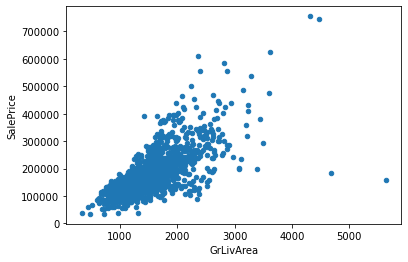

In [9]:
# Your code here - continuous numeric predictor
ames.plot(kind = 'scatter', x = 'GrLivArea', y = 'SalePrice')

### Discrete Numeric Predictor

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

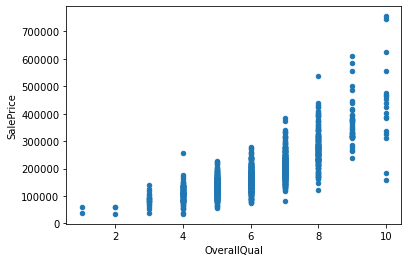

In [13]:
# Your code here - discrete numeric predictor
ames.plot(kind = 'scatter', x = 'OverallQual', y = 'SalePrice')

### String Categorical Predictor

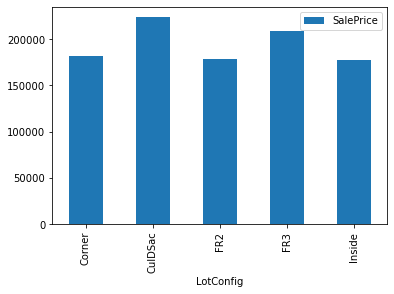

In [19]:
# Your code here - string categorical predictor
ames.groupby('LotConfig').mean('LotConfig').sort_index().plot.bar(y='SalePrice');

### Discrete Categorical Predictor

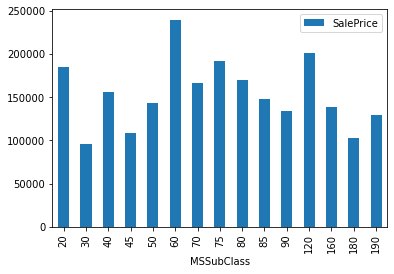

In [20]:
# Your code here - discrete categorical predictor
ames.groupby('MSSubClass').mean('MSSubClass').sort_index().plot.bar(y='SalePrice');

## Step 3: Build a Multiple Regression Model with Your Chosen Predictors

Choose the best-looking 3 out of 4 predictors to include in your model.

Make sure that you one-hot encode your categorical predictor(s) (regardless of whether the current data type is a string or number) first.

In [21]:
# Your code here - prepare X and y, including one-hot encoding
x = ames[['OverallQual', 'LotConfig', 'GrLivArea']]
y = ames['SalePrice']


Id
1       208500
2       181500
3       223500
4       140000
5       250000
         ...  
1456    175000
1457    210000
1458    266500
1459    142125
1460    147500
Name: SalePrice, Length: 1460, dtype: int64

In [25]:
# Your answer here - which category or categories were dropped?
x_onehot = pd.get_dummies(x, columns = ['LotConfig'], drop_first = True)
x_onehot


,OverallQual,GrLivArea,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside
Id,,,,,,
1,7,1710,0,0,0,1
2,6,1262,0,1,0,0
3,7,1786,0,0,0,1
4,7,1717,0,0,0,0
5,8,2198,0,1,0,0
...,...,...,...,...,...,...
1456,6,1647,0,0,0,1
1457,6,2073,0,0,0,1
1458,7,2340,0,0,0,1


In [29]:
# Your code here - build a regression model and display results
import statsmodels.api as sm
results = sm.OLS(y,sm.add_constant(x_onehot)).fit()
results.summary()
#When LotConfig is FR2 compared to corner, we see an increase of 1231 to the sale price.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     620.4
Date:                Fri, 26 Jul 2024   Prob (F-statistic):               0.00
Time:                        15:01:57   Log-Likelihood:                -17617.
No. Observations:                1460   AIC:                         3.525e+04
Df Residuals:                    1453   BIC:                         3.528e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.048e+05   5552.669    -18.873      0.000   -1.16e+05   -9.39e+04
OverallQual        3.266e+04    995.741     32.796      0.000    3.07e+04    3.46e+04
GrLivArea            55.4269      2.625     21.111      0.000      50.277      60.577
LotConfig_CulDSac  2.396e+04   5080.442      4.716      0.000     1.4e+04    3.39e+04
LotConfig_FR2      1231.7709   6697.829      0.184      0.854   -1.19e+04    1.44e+04
LotConfig_FR3     -8732.2817   2.13e+04     -0.410      0.682   -5.05e+04     3.3e+04
LotConfig_Inside   1362.0946   2919.118      0.467      0.641   -4364.041    7088.230
==============================================================================
Omnibus:                      348.303   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8861.534
Skew:                           0.495   Prob(JB):                         0.00
Kurtosis:                      15.029   Cond. No.                     3.09e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Step 4: Create Partial Regression Plots for Features

For each feature of the regression above (including the dummy features), plot the partial regression.

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


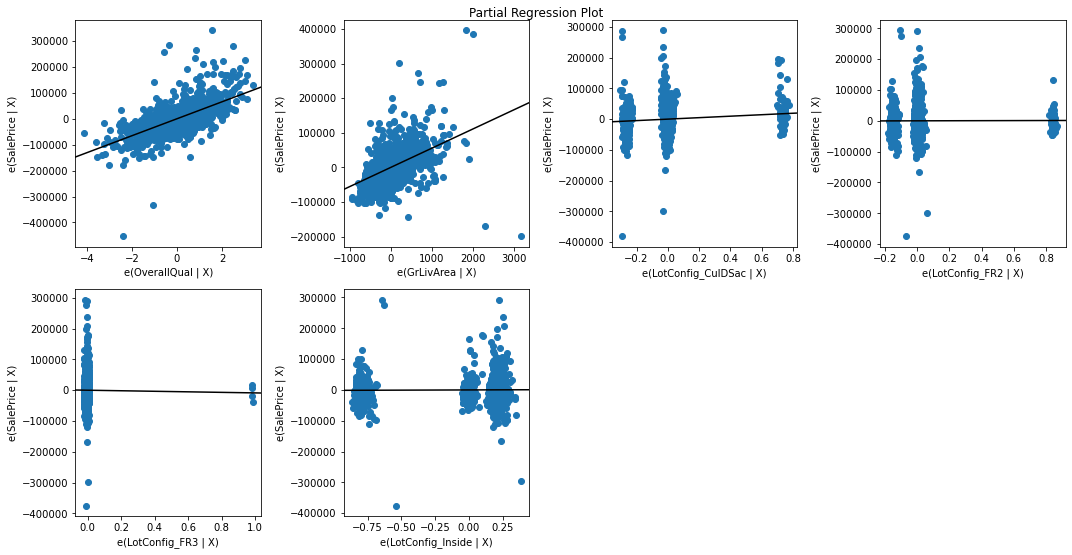

In [32]:
# Your code here - create partial regression plots
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,15))
sm.graphics.plot_partregress_grid(
    results,
    exog_idx=list(x_onehot.columns),
    grid=(4,4),
    fig=fig)
plt.tight_layout()
plt.show()

## Step 5: Calculate an Error-Based Metric

In addition to the adjusted R-Squared that we can see in the model summary, calculate either MAE or RMSE for this model.

In [33]:
# Your code here - calculate an error-based metric
from sklearn.metrics import mean_absolute_error

y_pred = results.predict(sm.add_constant(x_onehot))
mean_absolute_error(y, y_pred)

28532.897708765646

## Step 6: Summarize Findings

Between the model results, partial regression plots, and error-based metric, what does this model tell you? What would your next steps be to improve the model?

In [36]:
# Your answer here
#71.9% of the variance is explained in our model
#LotConfig_FR2, FR3 and Inside are not statistically significant
#Are other columns are
#LotConfig_CulDSac adds 2.396e4 to the price when compared to LotConfig_corner
#When OverallQuall, GrLivArea, and LotConfig is corner, we can expect a price of -$104k.
#When OverallQual increases by 1 price increases by $32k
#When GrLivArea increases by 1 sqft, price increases by $55

## Level Up (Optional)

Try transforming X using scikit-learn _and_ fitting a scikit-learn linear regression as well. If there are any differences in the result, investigate them.

In [38]:
# Your code here

## Summary

In this lab, you practiced your knowledge of categorical variables on the Ames Housing dataset! Specifically, you practiced distinguishing numeric and categorical data. You then created dummy variables using one hot encoding in order to build a multiple regression model.